In [1]:
import gc
import sys

import numpy as np
import pandas as pd
from tqdm import tqdm

import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# sns.set(font='IPAexGothic')

from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, n_jobs=-1)
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [3]:
!pwd

/Users/kenta_kasugai/competition/nishika_akutagawa/notebook


In [4]:
train = pd.read_csv(f'../input/train.csv')
test = pd.read_csv(f'../input/test.csv')

In [5]:
data = pd.concat([train, test])

In [6]:
data = data.reset_index(drop=True)

In [7]:
len(data)

4732

In [8]:
del train, test
gc.collect()

162

In [9]:
word_df = pd.read_csv("../input/feature_word.csv")

In [10]:
word_df.head()

,Unnamed: 0,γ線,〆切,あぁ,ああ,ああなる,あい,あいあい,あいかわらず,あいかわる,...,ｓ子,ｓｆ,ｓｏｓ,ｔｋ,ｔｋｏ,ｕｓａ,ｗｃ,ｘ線,ｙｗｃａ,ｚ旗
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
def visualize(df):
    tmp = pd.concat([data["author"], df], axis=1).dropna()
    tmp = tmp.dropna(axis=1)
    tmp.iloc[:, 1:] = tmp.iloc[:, 1:].apply(zscore, axis=0)
    tmp = tmp.dropna(axis=1)

    reduced = TSNE(n_components=2, random_state=0).fit_transform(tmp.drop("author", axis=1))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=tmp["author"])
    plt.show()

    reduced = PCA(n_components=2).fit_transform(tmp.drop("author", axis=1))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=tmp["author"])
    plt.show()

    kmeans.fit(tmp.drop("author", axis=1))
    kmeans_df = pd.DataFrame(data=[tmp["author"], kmeans.labels_]).T
    hoge = kmeans_df.groupby("Unnamed 0").sum()/kmeans_df.groupby("Unnamed 0").count()
    piyo = (kmeans_df.groupby("Unnamed 0").count() - kmeans_df.groupby("Unnamed 0").sum())/kmeans_df.groupby("Unnamed 0").count()
    display(pd.concat([kmeans_df.groupby("Unnamed 0").count(), hoge, piyo], axis=1))

In [12]:
word_df.sum()

Unnamed: 0    11193546
γ線                   1
〆切                  24
あぁ                   1
ああ                4950
ああなる                26
あい                 562
あいあい                 6
あいかわらず             128
あいかわる                2
あいがん                 5
あいき                  3
あいこ                  2
あいさつ               192
あいしょう                6
あいじゃく                3
あいす                 23
あいする                 1
あいせる                 9
あいそ                 86
あいぞめ                 3
あいた                 38
あいだ                802
あいつ                896
あいつぐ                 2
あいない                 3
あいなる                 1
あいにく               309
あいの                  1
あいぶ                 14
                ...   
ｂｃ                   6
ｂｃｇ                  1
ｃｃ                   1
ｃｄ                   1
ｃｇ                   1
ｃｒ                   1
ｄｂ                   6
ｄｃ                   4
ｄｄｔ                  3
ｇｈｑ                 17
ｇｉ                   4
ｉｒ                   1
ｊａ         

In [13]:
word_df.sum().sort_values()

ｚ旗                   1
挿木                   1
挿し絵                  1
挽茶                   1
ようは                  1
振鈴                   1
よう子                  1
振絞る                  1
振立てる                 1
振盪                   1
振替える                 1
振当てる                 1
振分荷物                 1
振付け                  1
振る舞う                 1
振り起す                 1
振り替える                1
振り放つ                 1
振り回せる                1
振り合い                 1
振り切れる                1
振り分ける                1
振り出せる                1
振り出す                 1
挿花                   1
ようするに                1
捏ね返す                 1
捕らえる                 1
掘っ立て                 1
排球                   1
                ...   
ひる               33975
これ               34151
云う               34224
まで               34461
思う               34974
られる              36276
居る               36450
さん               38420
自分               40572
来る               45887
見る               51878
という              57423
この         

In [14]:
columns_count100 = word_df.sum()[word_df.sum() > 100].index

In [15]:
columns_count100

Index(['Unnamed: 0', 'ああ', 'あい', 'あいかわらず', 'あいさつ', 'あいだ', 'あいつ', 'あいにく',
       'あいまい', 'あう',
       ...
       '黒川', '黒雲', '黙り込む', '黙る', '鼓動', '鼓舞', '鼠色', '鼻先', '齎す', '龍之介'],
      dtype='object', length=9503)

In [16]:
len(columns_count100)

9503

In [17]:
columns_count100[1:].values

array(['ああ', 'あい', 'あいかわらず', ..., '鼻先', '齎す', '龍之介'], dtype=object)

In [18]:
word_df = word_df.loc[:, columns_count100[1:].values]

In [19]:
word_df

,ああ,あい,あいかわらず,あいさつ,あいだ,あいつ,あいにく,あいまい,あう,あか,...,黒川,黒雲,黙り込む,黙る,鼓動,鼓舞,鼠色,鼻先,齎す,龍之介
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,0,4,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
word_df.columns = [col+"_count" for col in word_df.columns]

In [22]:
word_df

,ああ_count,あい_count,あいかわらず_count,あいさつ_count,あいだ_count,あいつ_count,あいにく_count,あいまい_count,あう_count,あか_count,...,黒川_count,黒雲_count,黙り込む_count,黙る_count,鼓動_count,鼓舞_count,鼠色_count,鼻先_count,齎す_count,龍之介_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,0,4,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
word_df.to_csv("../input/feature_word_count100.csv")

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
def pre_bow(df):
    word_list_bow = []
    for i in tqdm(range(len(df))):
        word = ""
        tmp = df.iloc[i]
        tmp = tmp[tmp.values > 0]
        for j in range(len(tmp)):
            word += ("{} ".format(tmp.index[j])*tmp.values[j])
        word_list_bow.append(word)
    return word_list_bow

In [26]:
docs = pre_bow(word_df)

100%|██████████| 4732/4732 [00:07<00:00, 618.92it/s]


In [27]:
tfidf = TfidfVectorizer()
bags = tfidf.fit_transform(docs)
features = tfidf.get_feature_names()

In [40]:
tfidf_df = pd.DataFrame(data=bags.toarray(), columns=features)

In [41]:
tfidf_df

,ああ_count,あい_count,あいかわらず_count,あいさつ_count,あいだ_count,あいつ_count,あいにく_count,あいまい_count,あう_count,あか_count,...,黒川_count,黒雲_count,黙り込む_count,黙る_count,鼓動_count,鼓舞_count,鼠色_count,鼻先_count,齎す_count,龍之介_count
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.020863,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.015162,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.005527,0.0,0.000000,0.000000,0.0,0.006294,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.015069,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.006842,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [42]:
tfidf_df.columns = [col[:-6]+"_tfidf" for col in tfidf_df.columns]

In [43]:
tfidf_df

,ああ_tfidf,あい_tfidf,あいかわらず_tfidf,あいさつ_tfidf,あいだ_tfidf,あいつ_tfidf,あいにく_tfidf,あいまい_tfidf,あう_tfidf,あか_tfidf,...,黒川_tfidf,黒雲_tfidf,黙り込む_tfidf,黙る_tfidf,鼓動_tfidf,鼓舞_tfidf,鼠色_tfidf,鼻先_tfidf,齎す_tfidf,龍之介_tfidf
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.020863,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.015162,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.005527,0.0,0.000000,0.000000,0.0,0.006294,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.015069,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,0.006842,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [44]:
tfidf_df.to_csv("../input/feature_word_count100_tfidf.csv")

In [3]:
tfidf_df = pd.read_csv("../input/feature_word_count100_tfidf.csv", index_col=0)

In [4]:
tfidf_df.head()

,ああ_tfidf,あい_tfidf,あいかわらず_tfidf,あいさつ_tfidf,あいだ_tfidf,あいつ_tfidf,あいにく_tfidf,あいまい_tfidf,あう_tfidf,あか_tfidf,...,黒川_tfidf,黒雲_tfidf,黙り込む_tfidf,黙る_tfidf,鼓動_tfidf,鼓舞_tfidf,鼠色_tfidf,鼻先_tfidf,齎す_tfidf,龍之介_tfidf
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.015162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


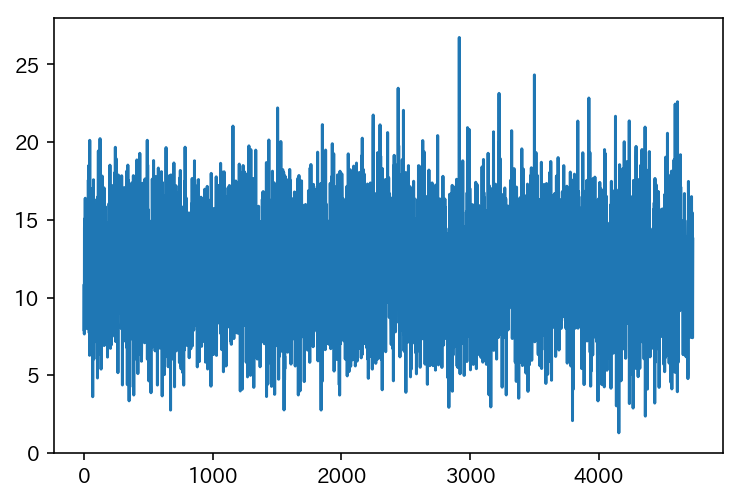

In [7]:
plt.plot(tfidf_df.sum(axis=1))

In [8]:
word_df = pd.read_csv("../input/feature_word_count100.csv", index_col=0)

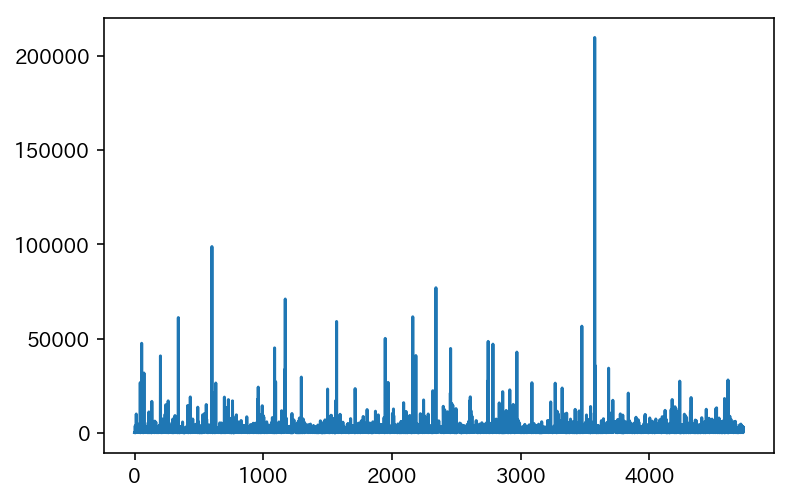

In [9]:
plt.plot(word_df.sum(axis=1))

In [21]:
import matplotlib.ticker as ticker

In [22]:
def pca(df, n_components):
    df = df.apply(zscore, axis=0)
    pca = PCA(n_components=n_components)
    pca.fit(df)
    reduce = pca.transform(df)
    reduce = pd.DataFrame(reduce, columns=["tfidf_pca"+str(n_components)+"_"+str(i) for i in range(n_components)])

    plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
    plt.plot([0] + list(np.cumsum(pca.explained_variance_ratio_)), "-o")
    plt.xlabel("Number of principal components")
    plt.ylabel("Cumulative contribution rate")
    plt.grid()
    plt.show()
    return reduce

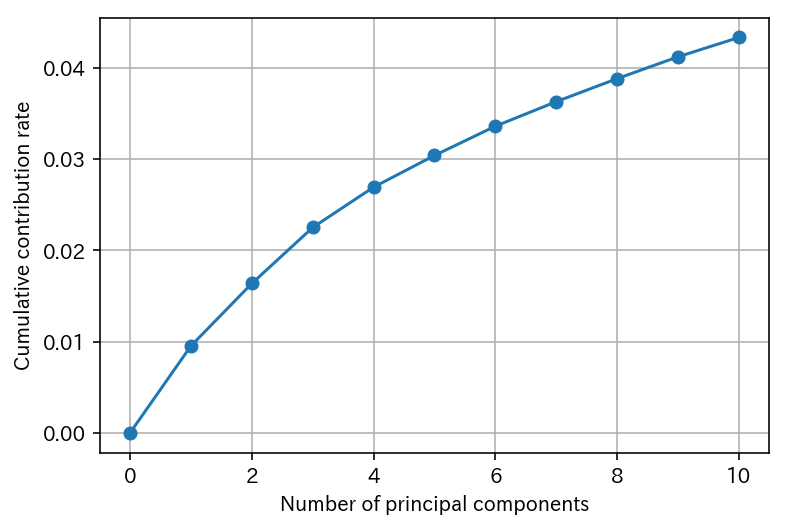

In [23]:
tfidf_pca10 = pca(tfidf_df, 10)
tfidf_pca10.to_csv("../input/feature_word_count100_tfidf_pca10.csv")

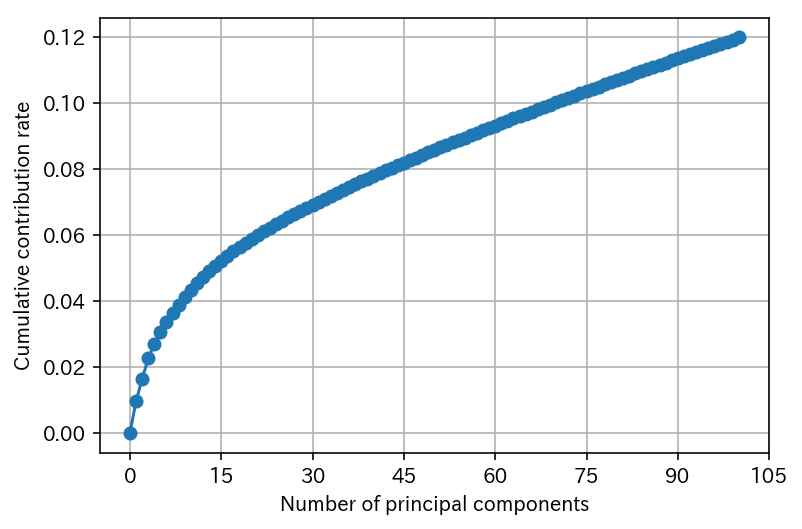

In [24]:
tfidf_pca100 = pca(tfidf_df, 100)
tfidf_pca100.to_csv("../input/feature_word_count100_tfidf_pca100.csv")

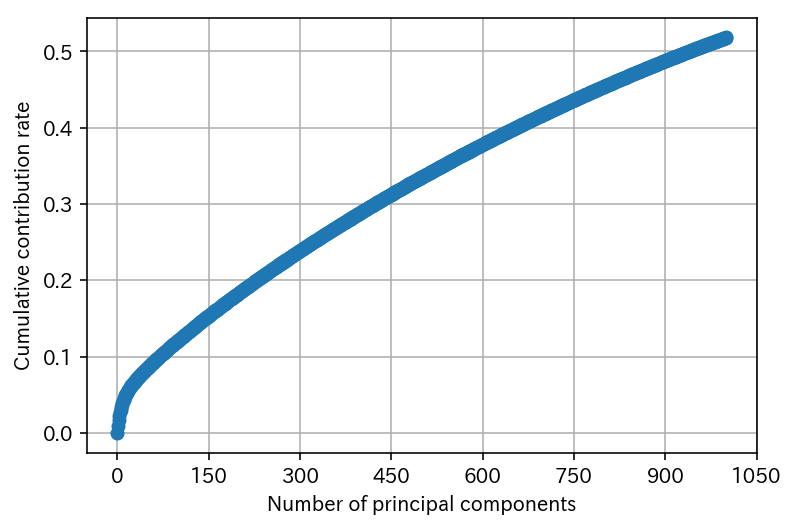

In [25]:
tfidf_pca1000 = pca(tfidf_df, 1000)
tfidf_pca1000.to_csv("../input/feature_word_count100_tfidf_pca1000.csv")

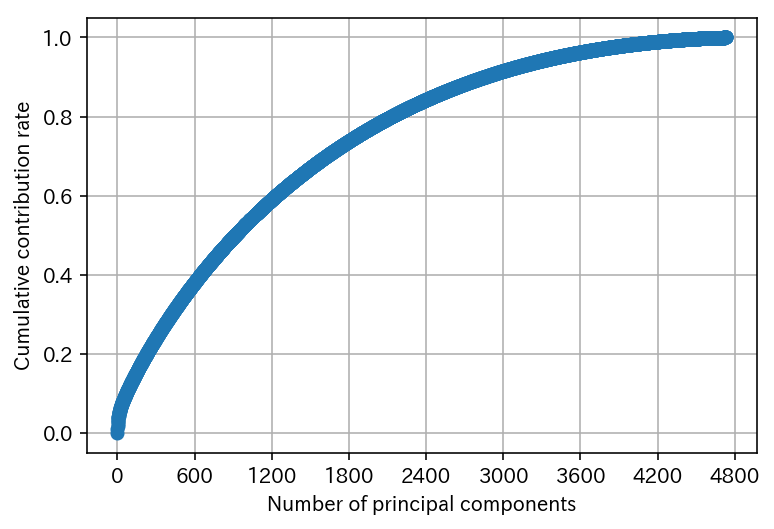

In [27]:
tfidf_pca1000 = pca(tfidf_df, min(tfidf_df.shape[0], tfidf_df.shape[1]))

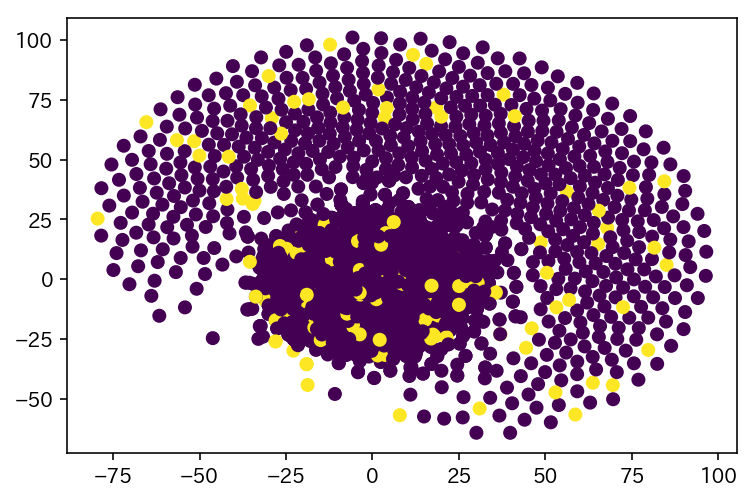

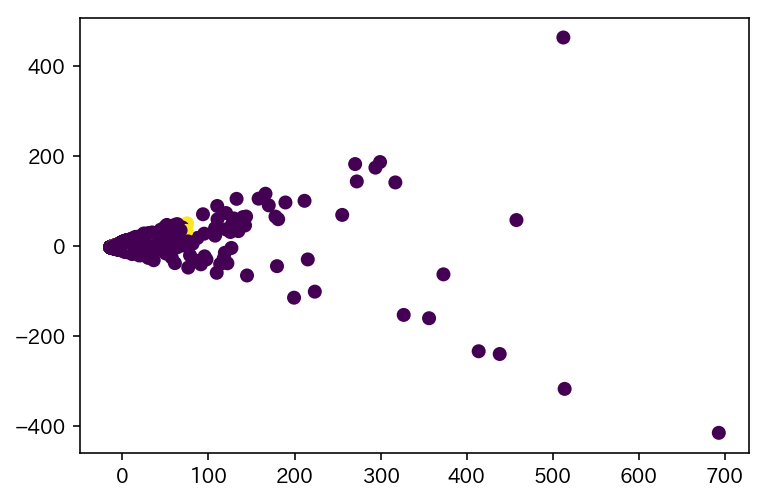

,author,author,author
Unnamed 0,,,
0.0,77,0.077922,0.922078
1.0,1,0.000000,1.000000
2.0,3,0.000000,1.000000
3.0,1,0.000000,1.000000
4.0,3208,0.076683,0.923317
5.0,14,0.000000,1.000000
6.0,1,0.000000,1.000000
7.0,2,0.000000,1.000000
8.0,2,0.000000,1.000000


In [75]:
visualize(word_df)

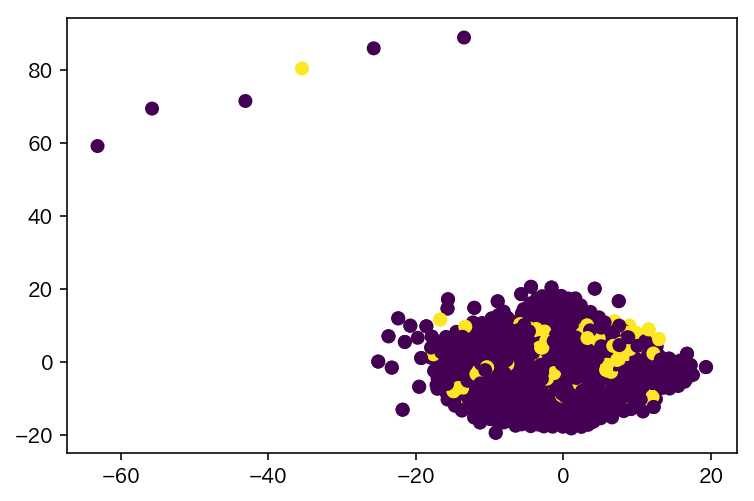

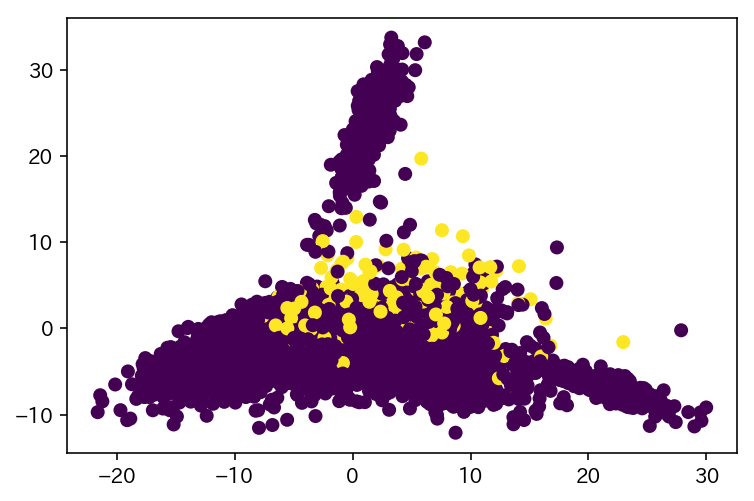

,author,author,author
Unnamed 0,,,
0.0,2,0.000000,1.000000
1.0,1,0.000000,1.000000
2.0,232,0.004310,0.995690
3.0,1,0.000000,1.000000
4.0,2,0.000000,1.000000
5.0,1505,0.076412,0.923588
6.0,4,0.250000,0.750000
7.0,1091,0.119157,0.880843
8.0,181,0.011050,0.988950


In [76]:
visualize(tfidf_df)